In [1]:
from scapy.all import rdpcap, PPI_DOT11COMMON, Packet, PacketList
from scapy.layers.dot11 import Dot11
import pyshark
import matplotlib.pyplot as plt

network_file = "network.pcap"

In [2]:
def processing_file(file_path: str):  
        packets:PacketList = rdpcap(file_path)
        return packets

processed_packets = processing_file(network_file)
print(f"Number of packets: {len(processed_packets)}")

Number of packets: 11850


In [3]:
import nest_asyncio
nest_asyncio.apply()
pyshark_capture = pyshark.FileCapture(network_file, keep_packets=True)

# Analysis of layer for protocolls

## Layer 4

In [4]:
def sort_packets_by_protocol(packets: PacketList):
    sorted_packets = {
        'TCP': [],
        'UDP': [],
        'ICMP': [],
        'ARP': [],
        'Other': []
    }
    
    for packet in packets:
        if packet.haslayer('TCP'):
            sorted_packets['TCP'].append(packet)
        elif packet.haslayer('UDP'):
            sorted_packets['UDP'].append(packet)
        elif packet.haslayer('ICMP'):
            sorted_packets['ICMP'].append(packet)
        elif packet.haslayer('ARP'):
            sorted_packets['ARP'].append(packet)
        
        else:
            sorted_packets['Other'].append(packet)
    
    return sorted_packets

In [5]:
sorteded_packets = sort_packets_by_protocol(processed_packets)
print("Numper of packets by layer 3 and 4 protocol:")
for protocol, packets in sorteded_packets.items():
    print(f"{protocol}: {len(packets)} packets")

Numper of packets by layer 3 and 4 protocol:
TCP: 10677 packets
UDP: 1169 packets
ICMP: 0 packets
ARP: 4 packets
Other: 0 packets


## Layer 7 protocol:

In [6]:

# protocols = set()
# for i, pkt in enumerate(processed_packets):
#     if i == 0:
#         continue
#     try:
#         protocol.__add__(pyshark_capture[i].highest_layer)
#     except:
#         app_proto = "Unknown"
#     print(pyshark_capture[i])
#     #print(f"Packet {i+1}: {app_proto}, Scapy summary: {pkt.summary()}")
# print(protocols)

In [7]:
def calculate_distribution_by_protocol(protocols: dict):
    protocol_counts = {protocol: len(packets) for protocol, packets in protocols.items()}
    total_packets = sum(protocol_counts.values())
    
    distribution = {protocol: count / total_packets * 100 for protocol, count in protocol_counts.items()}
    
    return distribution

def get_protocol_counts(protocols_dict):
    protocol_counts = {protocol: len(packets) for protocol, packets in protocols_dict.items()}
    return protocol_counts


In [8]:
def get_layer7_protocol_packets(capture):
    layer7_packets = {}
    i = 0
    for packet in capture:
        i+=1
        highest_layer = packet.highest_layer
        
        if highest_layer not in layer7_packets:
            layer7_packets[highest_layer] = []
        layer7_packets[highest_layer].append(i)
        
    return layer7_packets

layer7_packets = get_layer7_protocol_packets(pyshark_capture)
print("Number of packets by Layer 7 protocol:")
for protocol, packets in layer7_packets.items():
    print(f"{protocol}: {len(packets)} packets")
    

Number of packets by Layer 7 protocol:
SSH: 247 packets
TCP: 6731 packets
TLS: 3667 packets
MDNS: 76 packets
DNS: 203 packets
HTTP: 9 packets
DATA-TEXT-LINES: 8 packets
ARP: 4 packets
QUIC: 882 packets
SSDP: 8 packets
DATA: 15 packets


Create distribution per protocol:

In [9]:
distribution_layer_7 = calculate_distribution_by_protocol(layer7_packets)
for protocol, percentage in distribution_layer_7.items():
    print(f"{protocol}: {percentage:.2f}%")

SSH: 2.08%
TCP: 56.80%
TLS: 30.95%
MDNS: 0.64%
DNS: 1.71%
HTTP: 0.08%
DATA-TEXT-LINES: 0.07%
ARP: 0.03%
QUIC: 7.44%
SSDP: 0.07%
DATA: 0.13%


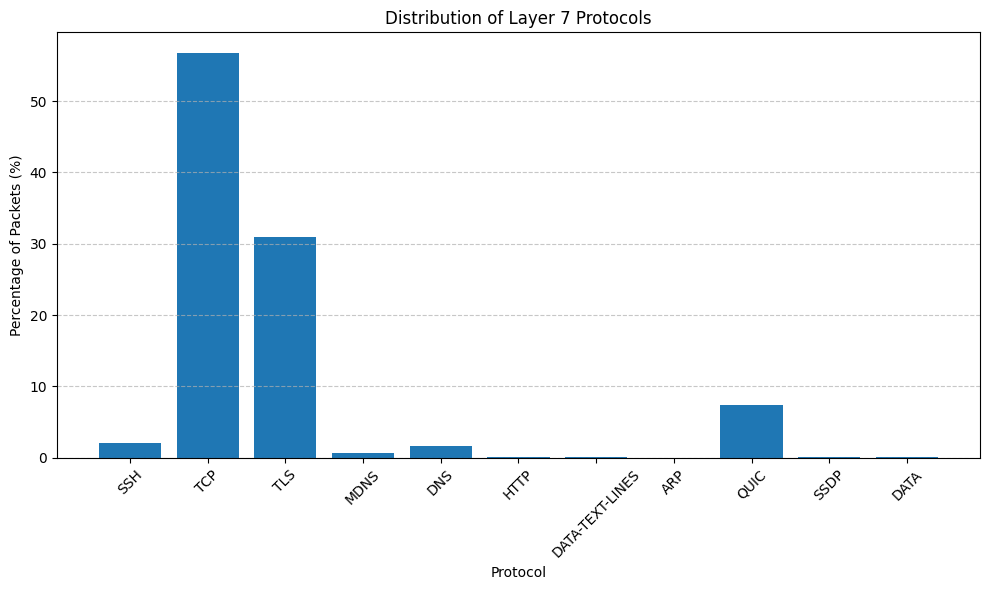

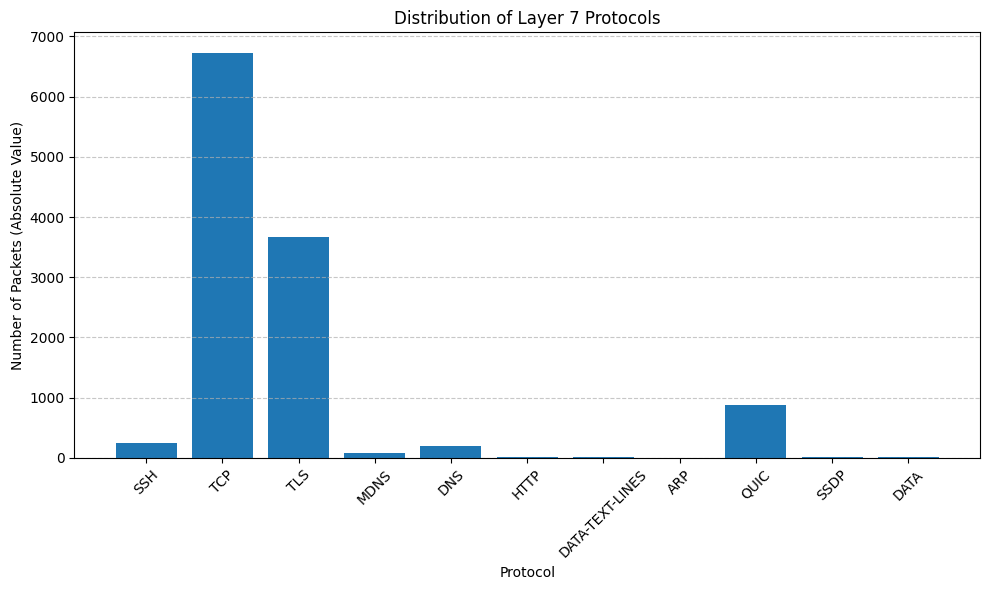

In [10]:
def protocol_distribution_bar_chart(distribution: dict, title: str = 'Distribution of Layer 7 Protocols'):
    protocols = list(distribution.keys())
    # Use absolute values for the y-axis
    values = list(distribution.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(protocols, values)
    plt.xlabel('Protocol')
    plt.ylabel('Percentage of Packets (%)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def protocol_distribution_bar_chart_absolute(distribution: dict, title: str = 'Distribution of Layer 7 Protocols'):
    protocols = list(distribution.keys())
    values = list(distribution.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(protocols, values)
    plt.xlabel('Protocol')
    plt.ylabel('Number of Packets (Absolute Value)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

protocol_distribution_bar_chart(distribution_layer_7, title='Distribution of Layer 7 Protocols')
protocol_distribution_bar_chart_absolute(get_protocol_counts(layer7_packets), title='Distribution of Layer 7 Protocols')

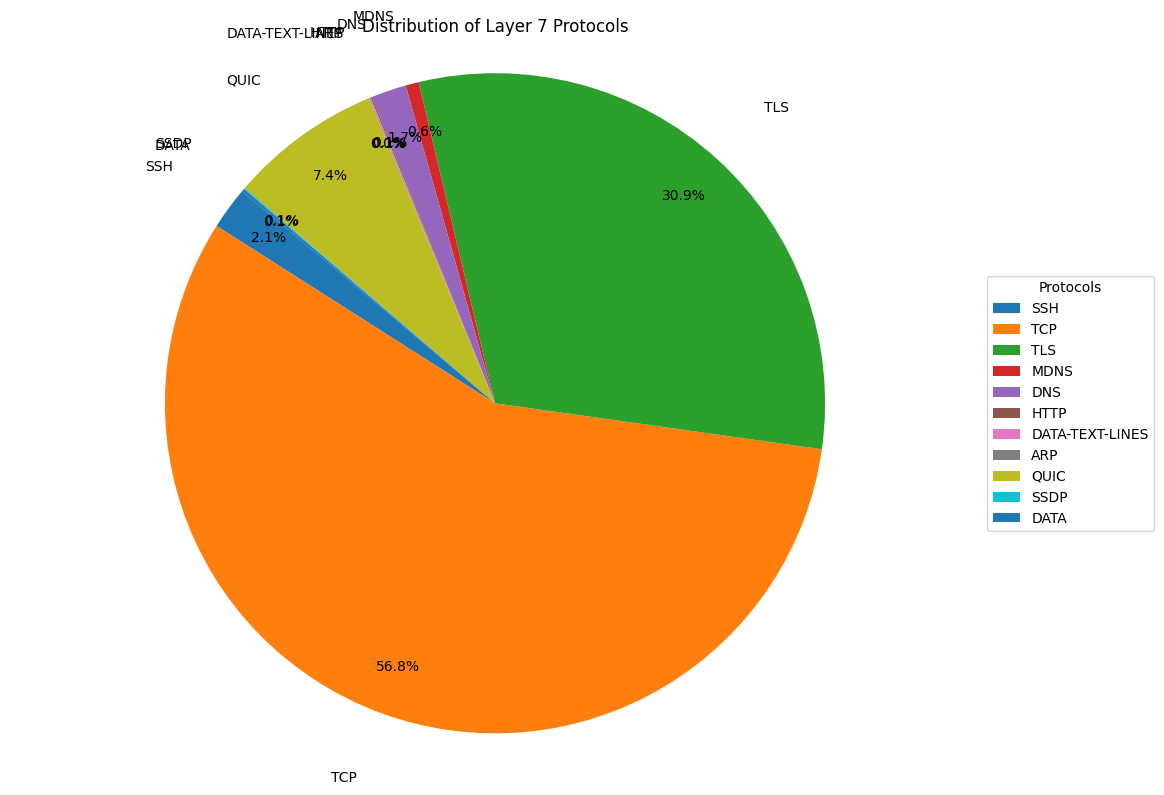

In [11]:
def protocol_distribution_py_chart(distribution: dict):
    protocols = list(distribution.keys())
    percentages = list(distribution.values())
    
    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(
        percentages, labels=protocols, autopct='%1.1f%%', startangle=140, 
        textprops={'fontsize': 10},
        pctdistance=0.85  # Move percentage labels closer to the center
    )
    # Increase distance of labels from the center to reduce overlap
    for text in texts:
        text.set_fontsize(10)
        text.set_position((1.1 * text.get_position()[0], 1.1 * text.get_position()[1]))
    plt.title('Distribution of Layer 7 Protocols')
    plt.axis('equal')
    plt.tight_layout()
    plt.legend(wedges, protocols, title="Protocols", bbox_to_anchor=(1, 0.5), loc="center left")
    plt.show()

protocol_distribution_py_chart(get_protocol_counts(layer7_packets))

In [15]:
import plotly.graph_objects as go

def plotly_pie_chart(data: dict, title: str = 'Distribution of Layer 7 Protocols'):
    
    fig = go.Figure(
        data=[
            go.Pie(
                labels=list(data.keys()),
                values=list(data.values())
            )
        ]
    )
    
    fig.update_layout(title_text=title)
    fig.show()
plotly_pie_chart(get_protocol_counts(layer7_packets))

In [18]:
def calculate_encryption_percentage(data:dict):
    total_packets = sum(data.values())
    encrypted_packets = data.get("QUIC",0) + data.get("TLS",0) + data.get("SSL",0) + data.get("HTTPS", 0) + data.get("SSH",0)
    
    if total_packets == 0:
        return 0.0
    
    encryption_percentage = (encrypted_packets / total_packets) * 100
    return encrypted_packets, encryption_percentage

total_encrypted, encryption_percentage = calculate_encryption_percentage(get_protocol_counts(layer7_packets))
print(f"Percentage of encrypted packets: {encryption_percentage:.2f}%")
print(f"Total encrypted packets: {total_encrypted}")

Percentage of encrypted packets: 40.47%
Total encrypted packets: 4796


In [16]:
def calculate_encrypted_packets_after_protocol(capture, protocol: str):
    encrypted_packets = 0
    total_packets = 0
    
    for packet in capture:
        if packet.highest_layer == protocol:
            total_packets += 1
            if 'encrypted' in packet:
                encrypted_packets += 1
    
    if total_packets == 0:
        return 0.0
    
    return (encrypted_packets / total_packets) * 100

def calculate_encrypted_packets_by_protocol(capture):
    encrypted_distribution = {}
    
    for packet in capture:
        protocol = packet.highest_layer
        if protocol not in encrypted_distribution:
            encrypted_distribution[protocol] = {
                'encrypted': 0,
                'total': 0
            }
        
        encrypted_distribution[protocol]['total'] += 1
        if 'encrypted' in packet:
            encrypted_distribution[protocol]['encrypted'] += 1
    
    for protocol, counts in encrypted_distribution.items():
        if counts['total'] > 0:
            counts['percentage'] = (counts['encrypted'] / counts['total']) * 100
        else:
            counts['percentage'] = 0.0
    
    return encrypted_distribution
encrypted_distribution = calculate_encrypted_packets_by_protocol(pyshark_capture)
print("Encrypted packets distribution by protocol:")
for protocol, counts in encrypted_distribution.items():
    print(f"{protocol}: {counts['encrypted']} encrypted packets out of {counts['total']} total packets ({counts['percentage']:.2f}%)")

Encrypted packets distribution by protocol:
SSH: 0 encrypted packets out of 247 total packets (0.00%)
TCP: 0 encrypted packets out of 6731 total packets (0.00%)
TLS: 0 encrypted packets out of 3667 total packets (0.00%)
MDNS: 0 encrypted packets out of 76 total packets (0.00%)
DNS: 0 encrypted packets out of 203 total packets (0.00%)
HTTP: 0 encrypted packets out of 9 total packets (0.00%)
DATA-TEXT-LINES: 0 encrypted packets out of 8 total packets (0.00%)
ARP: 0 encrypted packets out of 4 total packets (0.00%)
QUIC: 0 encrypted packets out of 882 total packets (0.00%)
SSDP: 0 encrypted packets out of 8 total packets (0.00%)
DATA: 0 encrypted packets out of 15 total packets (0.00%)


Analysing Arp-Requests

Analys

In [ ]:
def packets_per_host(processed_packets:PacketList):


In [ ]:
def chart_packets_over_time():
    